In [1]:
# for data handling
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/TR_BI/Data/UNdata_Export_2019_2022.csv")
df

,Country or Area,Year,Commodity,Flow,Trade (USD),Weight (kg),Quantity Name,Quantity
0,Afghanistan,2016,ALL COMMODITIES,Import,6534140413,NaN,No Quantity,NaN
1,Afghanistan,2016,ALL COMMODITIES,Export,596455337,NaN,No Quantity,NaN
2,Afghanistan,2015,ALL COMMODITIES,Import,7722865049,NaN,No Quantity,NaN
3,Afghanistan,2015,ALL COMMODITIES,Export,571404967,NaN,No Quantity,NaN
4,Afghanistan,2014,ALL COMMODITIES,Import,7697178170,NaN,No Quantity,NaN
...,...,...,...,...,...,...,...,...
9776,Zimbabwe,2001,ALL COMMODITIES,Export,1206663233,NaN,No Quantity,NaN
9777,Zimbabwe,2001,ALL COMMODITIES,Re-Export,15942288,NaN,No Quantity,NaN
9778,Zimbabwe,2000,ALL COMMODITIES,Export,1879631083,NaN,No Quantity,NaN
9779,Zimbabwe,1995,ALL COMMODITIES,Import,2658853376,NaN,No Quantity,NaN


In [ ]:
COLS=['Country or Area','Year','Flow','Trade (USD)']
df[COLS].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9781 entries, 0 to 9780
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country or Area  9781 non-null   object
 1   Year             9781 non-null   int64 
 2   Flow             9781 non-null   object
 3   Trade (USD)      9781 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 305.8+ KB


In [ ]:
pd.options.display.float_format = '{:.5f}'.format

# Annual Trade Volume by country
df1= (df[COLS]
     .query('Flow == "Export" & Year > 1999 & Year < 2017')
     .assign(Year = df['Year'].astype('str'))  # conver number type to string type
     .pivot_table(index='Country or Area',columns = 'Year',values='Trade (USD)',aggfunc = 'sum')
     .dropna()
)
df1

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country or Area,,,,,,,,,,,,,,,,,
Albania,261475781.00000,304930699.00000,330241497.00000,447220546.00000,602653356.00000,658233171.00000,792629671.00000,1077690359.00000,1354921653.00000,1087914902.00000,1549955724.00000,1948207305.00000,1967918947.00000,2331521928.00000,2430723644.00000,1929657032.00000,1962117416.00000
Algeria,22031287644.00000,19147619190.00000,18832409255.00000,24653655793.00000,32076791698.00000,46001735483.00000,54612721784.00000,60163160346.00000,79297591513.00000,45193920241.00000,57050973573.00000,73436306091.00000,71865748994.00000,65998137595.00000,60387689304.00000,34795951491.00000,29992101470.00000
Argentina,26341029193.00000,26610055335.00000,25709371110.00000,29938752000.00000,34575705522.00000,40106386092.00000,46546224081.00000,55779579836.00000,70018850811.00000,55672118600.00000,68174446579.00000,82981091282.00000,79982379582.00000,75962981361.00000,68407381825.00000,56787982272.00000,57733350414.00000
Armenia,294102939.00000,335831375.00000,527203711.00000,670474788.00000,722911500.00000,936977335.00000,1003961105.00000,1121222464.00000,1055012744.00000,683989374.00000,1011424747.00000,1320411381.00000,1428120692.00000,1467799672.00000,1490190146.00000,1482667349.00000,1807789510.00000
Aruba,172999090.00000,148856140.00000,128258862.00000,82190500.00000,79682025.00000,106204900.00000,108964805.00000,97892753.00000,100869319.00000,135747078.00000,124523218.00000,151359633.00000,173060835.00000,167761270.00000,116214260.00000,79882205.00000,95029332.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,37719889281.00000,32669157299.00000,52163400000.00000,67135000000.00000,90638000000.00000,115452993193.00000,142505000000.00000,156634000000.00000,210000000000.00000,174725000000.00000,198362000000.00000,252556000000.00000,350123000000.00000,379488767867.00000,380339616263.00000,333362349875.00000,298650942398.00000
United Kingdom,294899046600.00000,279425458536.00000,285996254299.00000,312059899702.00000,355027953622.00000,392744018675.00000,458598557420.00000,454005489911.00000,482020961916.00000,359615540058.00000,422014118473.00000,517288693419.00000,481225753723.00000,548041853304.00000,511145442935.00000,466295682754.00000,411463355625.00000
United Rep. of Tanzania,655840668.00000,768322740.00000,901362265.00000,1132004180.00000,1473113396.00000,1671777582.00000,1864681470.00000,2139346909.00000,3121078906.00000,2982404782.00000,4050546445.00000,4734959519.00000,5547229200.00000,4412548850.00000,5704653520.00000,5854230521.00000,4741924583.00000


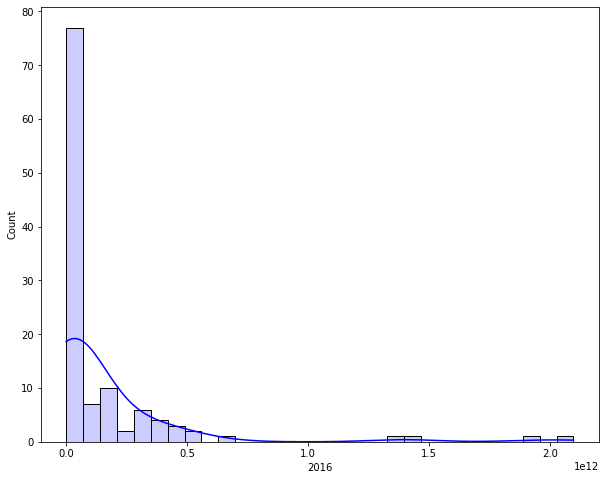

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=df1['2016'], kde='True',bins=30, color='blue', alpha=0.2, label='0')
plt.show()

### 표준화(Standardization)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
std_var = df1.columns
std_var

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object', name='Year')

In [ ]:
scaler = StandardScaler().fit(df1[std_var])
rescaled_df1 = pd.DataFrame(scaler.transform(df1[std_var]), columns=df1[std_var].columns, index=df1.index)
rescaled_df1

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Country or Area,,,,,,,,,,,,,,,,,
Albania,-0.44805,-0.44726,-0.45241,-0.45741,-0.46252,-0.46942,-0.47257,-0.46735,-0.47295,-0.46603,-0.47090,-0.47476,-0.47095,-0.46458,-0.45733,-0.43929,-0.44354
Algeria,-0.28361,-0.30060,-0.31443,-0.30092,-0.29247,-0.24898,-0.24373,-0.25193,-0.22208,-0.28712,-0.28190,-0.26890,-0.27326,-0.29300,-0.30348,-0.34397,-0.35890
Argentina,-0.25106,-0.24251,-0.26315,-0.26676,-0.27897,-0.27764,-0.27803,-0.26791,-0.25195,-0.24462,-0.24402,-0.24142,-0.25030,-0.26615,-0.28219,-0.28019,-0.27513
Armenia,-0.44781,-0.44702,-0.45094,-0.45597,-0.46187,-0.46807,-0.47167,-0.46719,-0.47391,-0.46767,-0.47273,-0.47657,-0.47248,-0.46691,-0.45983,-0.44059,-0.44400
Aruba,-0.44872,-0.44848,-0.45391,-0.45977,-0.46535,-0.47211,-0.47547,-0.47092,-0.47698,-0.46990,-0.47575,-0.47993,-0.47603,-0.47042,-0.46348,-0.44466,-0.44918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,-0.16510,-0.19535,-0.06588,-0.02630,0.02393,0.08867,0.12997,0.09980,0.19859,0.23830,0.19932,0.24689,0.51375,0.55185,0.54586,0.52195,0.45237
United Kingdom,1.77756,1.72537,1.67787,1.55703,1.45241,1.43677,1.47393,1.18400,1.07411,0.98828,0.96094,1.00922,0.88455,1.00610,0.89309,0.90749,0.79302
United Rep. of Tanzania,-0.44508,-0.44366,-0.44815,-0.45298,-0.45782,-0.46450,-0.46801,-0.46348,-0.46726,-0.45835,-0.46238,-0.46674,-0.46083,-0.45898,-0.44864,-0.42791,-0.43514


In [ ]:
# mean by column(year)
scaler.data_max_

array([7.81830673e+11, 7.91646443e+11, 8.61290940e+11, 1.00664077e+12,
       1.20967968e+12, 1.34582265e+12, 1.49999329e+12, 1.75732286e+12,
       2.02606297e+12, 1.60013381e+12, 1.80598462e+12, 2.17781829e+12,
       2.17908956e+12, 2.31165643e+12, 2.34229270e+12, 2.27346822e+12,
       2.09763717e+12])

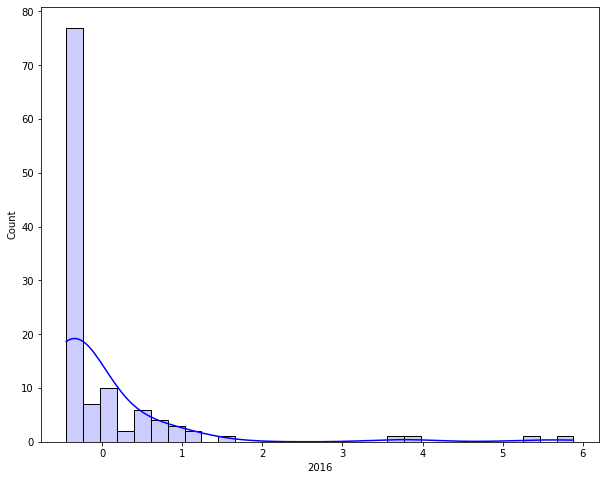

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=rescaled_df1['2016'], kde='True',bins=30, color='blue', alpha=0.2, label='0')
plt.show()

# 1.계층적 군집화(Hiearchical Clustering)

In [ ]:
# module loading
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn import cluster

In [ ]:
Z = linkage(rescaled_df1, metric='euclidean', method='ward')

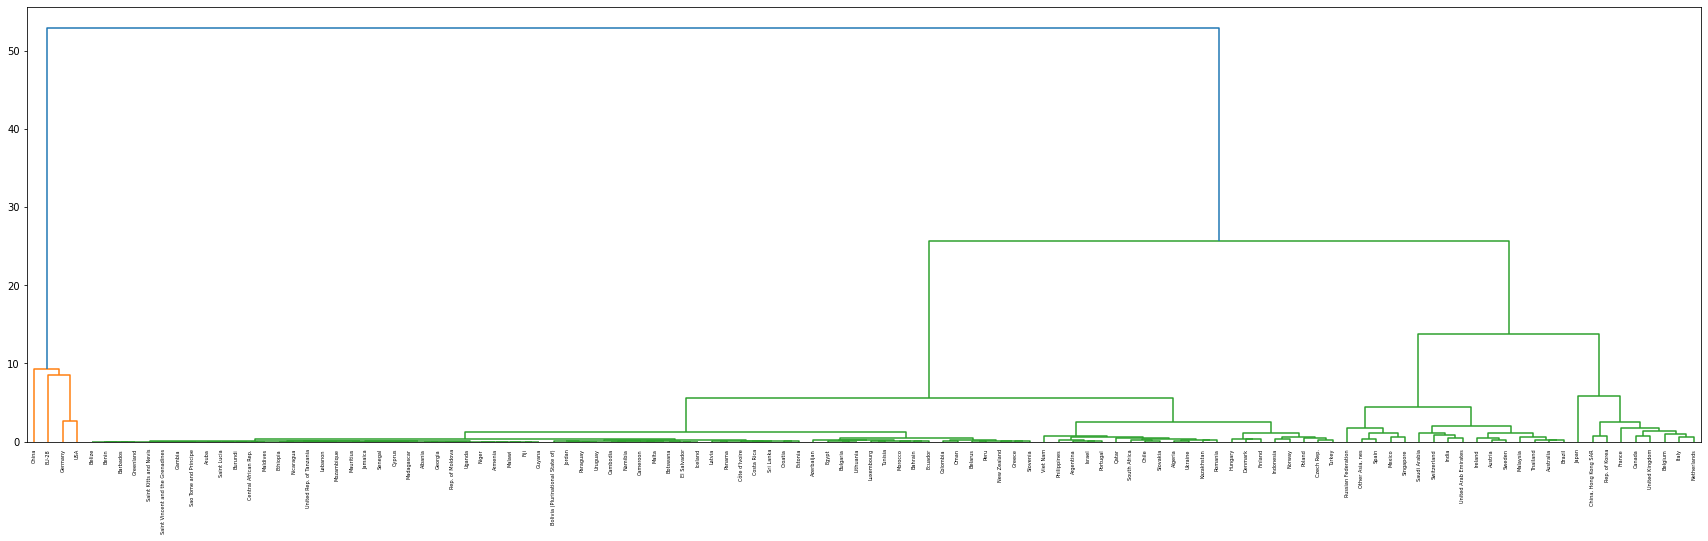

In [ ]:
plt.figure(figsize=(30,8))
dendrogram(Z, labels=rescaled_df1.index)
plt.show()

In [ ]:
nclust = 15
hc = AgglomerativeClustering(n_clusters=nclust, affinity='euclidean', linkage='ward')
clust_labels1 = hc.fit_predict(rescaled_df1)
clust_labels1

array([ 1,  5,  5,  1,  1,  7,  7,  1,  1,  1,  1,  0,  1,  1,  1,  1,  7,
        1,  1,  1,  1,  0,  1,  5,  9,  4,  1,  1,  1,  1,  3,  1,  3, 11,
        1,  1,  1,  1,  1,  1,  3, 13,  1,  1, 10,  1,  1,  1,  3,  1,  2,
        3,  7,  5,  0,  1, 14,  1,  5,  1,  1,  1,  1,  1,  1,  7,  1,  1,
        1,  8,  1,  1,  1,  0,  1,  1,  1,  3,  1,  8,  1,  1,  1,  5,  3,
        5,  5,  4,  1,  5,  6,  1,  1,  1,  1,  2,  1,  8,  5,  1,  5,  8,
        1,  7,  2,  7,  1,  3, 12,  1,  5,  2,  0,  1,  1,  5])

In [ ]:
rescaled_df1['cluster_id'] = clust_labels1
rescaled_df1

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,cluster_id
Country or Area,,,,,,,,,,,,,,,,,,
Albania,-0.44805,-0.44726,-0.45241,-0.45741,-0.46252,-0.46942,-0.47257,-0.46735,-0.47295,-0.46603,-0.47090,-0.47476,-0.47095,-0.46458,-0.45733,-0.43929,-0.44354,1
Algeria,-0.28361,-0.30060,-0.31443,-0.30092,-0.29247,-0.24898,-0.24373,-0.25193,-0.22208,-0.28712,-0.28190,-0.26890,-0.27326,-0.29300,-0.30348,-0.34397,-0.35890,5
Argentina,-0.25106,-0.24251,-0.26315,-0.26676,-0.27897,-0.27764,-0.27803,-0.26791,-0.25195,-0.24462,-0.24402,-0.24142,-0.25030,-0.26615,-0.28219,-0.28019,-0.27513,5
Armenia,-0.44781,-0.44702,-0.45094,-0.45597,-0.46187,-0.46807,-0.47167,-0.46719,-0.47391,-0.46767,-0.47273,-0.47657,-0.47248,-0.46691,-0.45983,-0.44059,-0.44400,1
Aruba,-0.44872,-0.44848,-0.45391,-0.45977,-0.46535,-0.47211,-0.47547,-0.47092,-0.47698,-0.46990,-0.47575,-0.47993,-0.47603,-0.47042,-0.46348,-0.44466,-0.44918,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,-0.16510,-0.19535,-0.06588,-0.02630,0.02393,0.08867,0.12997,0.09980,0.19859,0.23830,0.19932,0.24689,0.51375,0.55185,0.54586,0.52195,0.45237,2
United Kingdom,1.77756,1.72537,1.67787,1.55703,1.45241,1.43677,1.47393,1.18400,1.07411,0.98828,0.96094,1.00922,0.88455,1.00610,0.89309,0.90749,0.79302,0
United Rep. of Tanzania,-0.44508,-0.44366,-0.44815,-0.45298,-0.45782,-0.46450,-0.46801,-0.46348,-0.46726,-0.45835,-0.46238,-0.46674,-0.46083,-0.45898,-0.44864,-0.42791,-0.43514,1


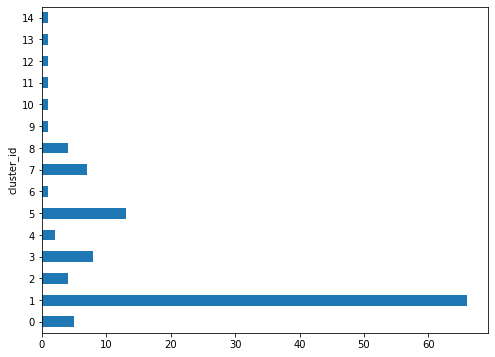

In [ ]:
rescaled_df1.groupby('cluster_id')['2016'].count().plot(kind='barh', figsize=(8,6))

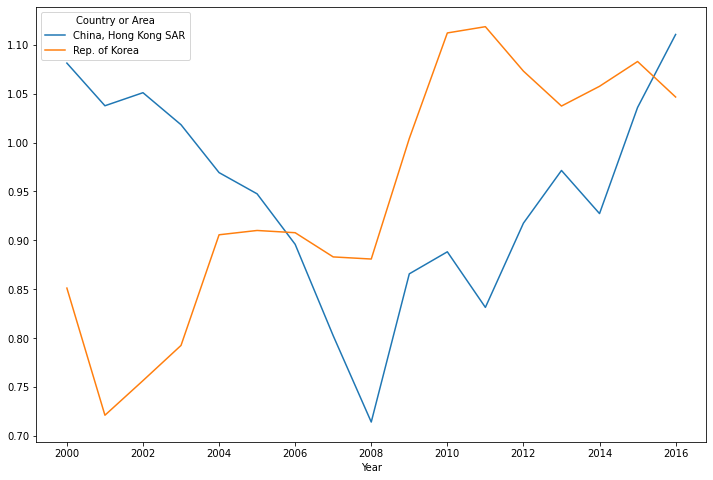

In [ ]:
rescaled_df1.query('cluster_id==4').T.drop('cluster_id',axis=0).plot(figsize=(12,8))

plt.show()

# 2. K-Means Clustering

In [ ]:
nclust = 15
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(rescaled_df1)

target_labels = k_means.predict(rescaled_df1)
target_labels

array([ 2,  4,  4,  2,  2,  9,  9,  2,  2,  2,  2,  7,  2,  2,  2,  2,  9,
        2,  2,  2,  2,  7,  2,  4,  1, 11,  2,  2,  2,  2, 10,  2, 10,  5,
        2,  2,  2,  2,  2,  2, 10, 13,  2,  2, 12,  2,  2,  2, 10,  2,  0,
       10,  9,  4,  7,  2,  6,  2,  4,  2,  2,  2,  2,  2,  2,  9,  2,  2,
        2, 14,  2,  2,  2,  7,  2,  2,  2, 10,  2, 14,  2,  2,  2,  4, 10,
        4,  4, 11,  2,  4,  3,  2,  2,  2,  2,  0,  2, 14,  4,  2,  4, 14,
        2,  9,  0,  9,  2, 10,  8,  2,  4,  0,  7,  2,  2,  4],
      dtype=int32)

In [ ]:
rescaled_df1['cluster_id'] = target_labels
rescaled_df1

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,cluster_id
Country or Area,,,,,,,,,,,,,,,,,,
Albania,-0.44805,-0.44726,-0.45241,-0.45741,-0.46252,-0.46942,-0.47257,-0.46735,-0.47295,-0.46603,-0.47090,-0.47476,-0.47095,-0.46458,-0.45733,-0.43929,-0.44354,2
Algeria,-0.28361,-0.30060,-0.31443,-0.30092,-0.29247,-0.24898,-0.24373,-0.25193,-0.22208,-0.28712,-0.28190,-0.26890,-0.27326,-0.29300,-0.30348,-0.34397,-0.35890,4
Argentina,-0.25106,-0.24251,-0.26315,-0.26676,-0.27897,-0.27764,-0.27803,-0.26791,-0.25195,-0.24462,-0.24402,-0.24142,-0.25030,-0.26615,-0.28219,-0.28019,-0.27513,4
Armenia,-0.44781,-0.44702,-0.45094,-0.45597,-0.46187,-0.46807,-0.47167,-0.46719,-0.47391,-0.46767,-0.47273,-0.47657,-0.47248,-0.46691,-0.45983,-0.44059,-0.44400,2
Aruba,-0.44872,-0.44848,-0.45391,-0.45977,-0.46535,-0.47211,-0.47547,-0.47092,-0.47698,-0.46990,-0.47575,-0.47993,-0.47603,-0.47042,-0.46348,-0.44466,-0.44918,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Arab Emirates,-0.16510,-0.19535,-0.06588,-0.02630,0.02393,0.08867,0.12997,0.09980,0.19859,0.23830,0.19932,0.24689,0.51375,0.55185,0.54586,0.52195,0.45237,0
United Kingdom,1.77756,1.72537,1.67787,1.55703,1.45241,1.43677,1.47393,1.18400,1.07411,0.98828,0.96094,1.00922,0.88455,1.00610,0.89309,0.90749,0.79302,7
United Rep. of Tanzania,-0.44508,-0.44366,-0.44815,-0.45298,-0.45782,-0.46450,-0.46801,-0.46348,-0.46726,-0.45835,-0.46238,-0.46674,-0.46083,-0.45898,-0.44864,-0.42791,-0.43514,2


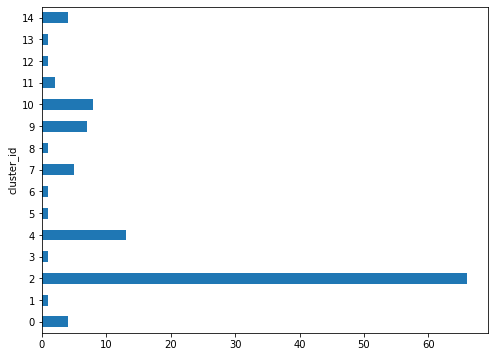

In [ ]:
(
rescaled_df1
    .groupby('cluster_id')['2016']
    .count()
    .plot(kind='barh', figsize=(8,6))
)

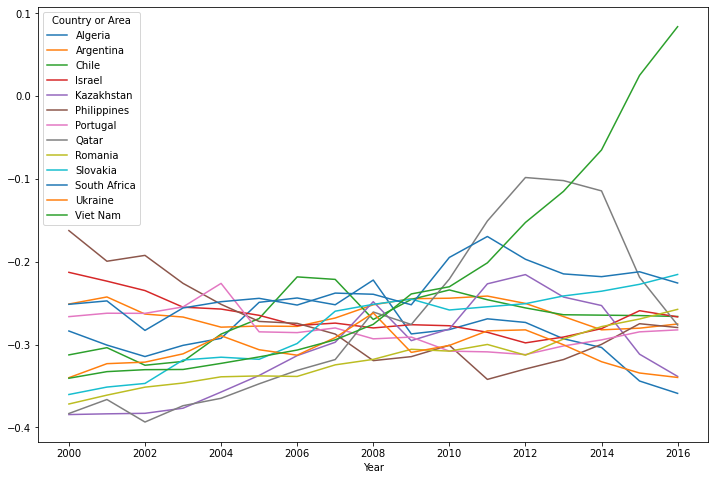

In [ ]:
(rescaled_df1
     .query('cluster_id==4')
     .T.drop('cluster_id',axis=0)
     .plot(figsize=(12,8))
)
plt.show()

## Finding good the number of cluster

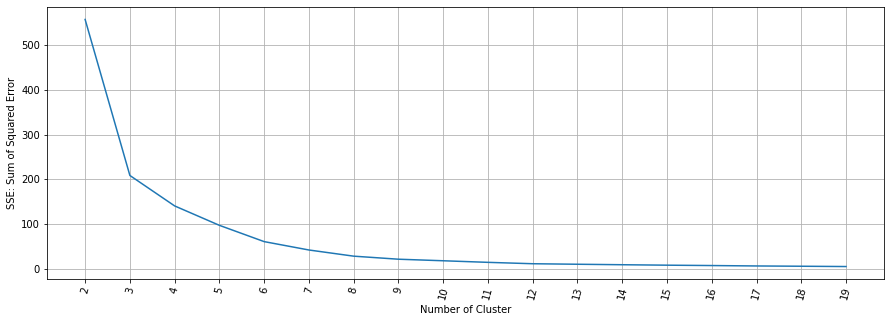

In [ ]:
distort = []
max_loop = 20
for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k)
    k_means.fit(rescaled_df1[std_var])
    distort.append(k_means.inertia_)

fig = plt.figure(figsize=(15,5))
plt.plot(range(2, max_loop), distort)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel('Number of Cluster')
plt.ylabel('SSE: Sum of Squared Error')
plt.grid(True)
plt.show()

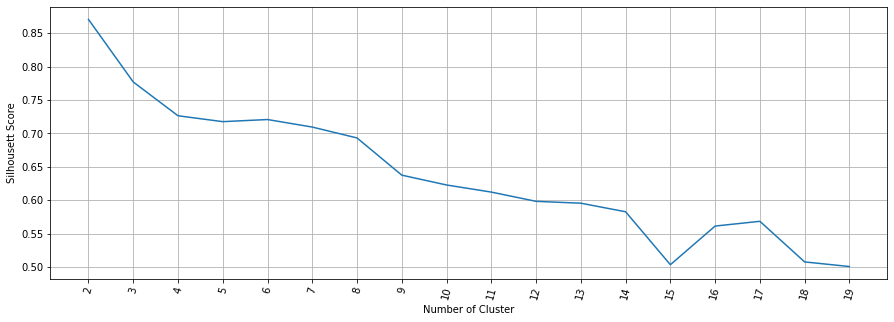

In [ ]:
from sklearn import metrics
silhouette_sc = []
for k in range(2, max_loop):
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
    kmeans.fit(rescaled_df1[std_var])
    silhouette_sc.append(metrics.silhouette_score(rescaled_df1[std_var], kmeans.labels_, random_state=10))

fig = plt.figure(figsize=(15,5))
plt.plot(range(2, max_loop), silhouette_sc)
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.xlabel('Number of Cluster')
plt.ylabel('Silhousett Score')
plt.grid(True)
plt.show()

# 3. 기타 Clustering 알고리즘 : DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=2).fit(rescaled_df1[std_var])
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0, -1,  2,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  3,  0,  0,  0,  1,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,
        0,  0,  2,  0,  0, -1,  0,  0,  0,  0, -1,  0,  3,  0,  0,  0,  3,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0,  0,  0])